### Imports

## Querring and saving artilce list

In [1]:
import main_var
mv = main_var.main_var()

from article_scraping_lib import *
from article_parsing_lib import *
from openai_module_lib import *
from embedding_keyword_module_lib import *
from visualization_module_lib import *
from dimension_reduc_lib import *
from aggregation_module_lib import *
from utils_art import *


_ENTRY_NUMBER = 50
_STEP_PCT = 0.5

IMPORT : main_var 
IMPORT : utils_art
IMPORT : text_analysis



Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


IMPORT : embedding_keyword_module_lib
IMPORT : article_scraping_lib


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


IMPORT : article_parsing_lib
IMPORT : openai_module_lib
IMPORT : dimension_reduc 


In [2]:
# df_query = openDFcsv(mv.query_path,mv.query_filename)
df_query = loop_scraping(number_topics=9,
                   startDate='2023-01-01',
                   endDate='2024-01-01',
                   sampling_1=1,
                   sampling_2=2,
                   save_steps=True,
                   save_final=True,
                   display=True)

   -===-   -===-   Loop Scrapping module start   -===-   -===-   
 - List of topics : '[0, 1, 2, 3, 4, 5, 6, 7, 8]'  (9)
 - From '2023-01-01 00:00:00'' to '2024-01-01 00:00:00' (365 days)
 - Sampling this numebr of periods : '1'  (365.0 days)
 - Expected articles found : '900''  (2.47/day)


   -===-   Scrapping module start   -===-   
 - List of topics : '[0, 1, 2, 3, 4, 5, 6, 7, 8]'  (9)
 - From '2023-01-01 00:00:00'' to '2023-12-31 00:00:00' (364 days)
 - Sampling this numebr of periods : '2'  (182.0 days)
 - Expected articles found : '1800''  (4.95/day)
     - Sample num 1 done (891 articles found)
     - Sample num 2 done (895 articles found)
 - Saving result table : 'C:/Users/User/OneDrive/Desktop/Article_LLM/main_files/1_1_query_main/.main/query_file_0.csv'
 - Total of '1786' articles found (99.22% of expected) !
   -===-   Scrapping module end   -===-   



 - Total of '1786' articles found (99.22% of expected) !
   -===-   -===-   Loop Scrapping module end   -===-   -===-   
F

#### Display Statistics


   ------   Raw dataframe   ------   

Shape :  [1786, 11]
Column type :  title           object
link            object
published       object
source_url      object
source_title    object
category        object
year            object
year_month      object
pk              object
url_list        object
url_TLD         object
dtype: object



   ------   Most common sources   ------   

source_title
World Health Organization (WHO)     120
Science                              87
Entertainment Weekly News            53
Welcome to the United Nations        49
World Bank Group                     36
                                   ... 
University of Connecticut             1
Oberlin College and Conservatory      1
WORLD Channel                         1
UMM News, Sports & Events             1
Health.com                            1
Name: count, Length: 686, dtype: int64






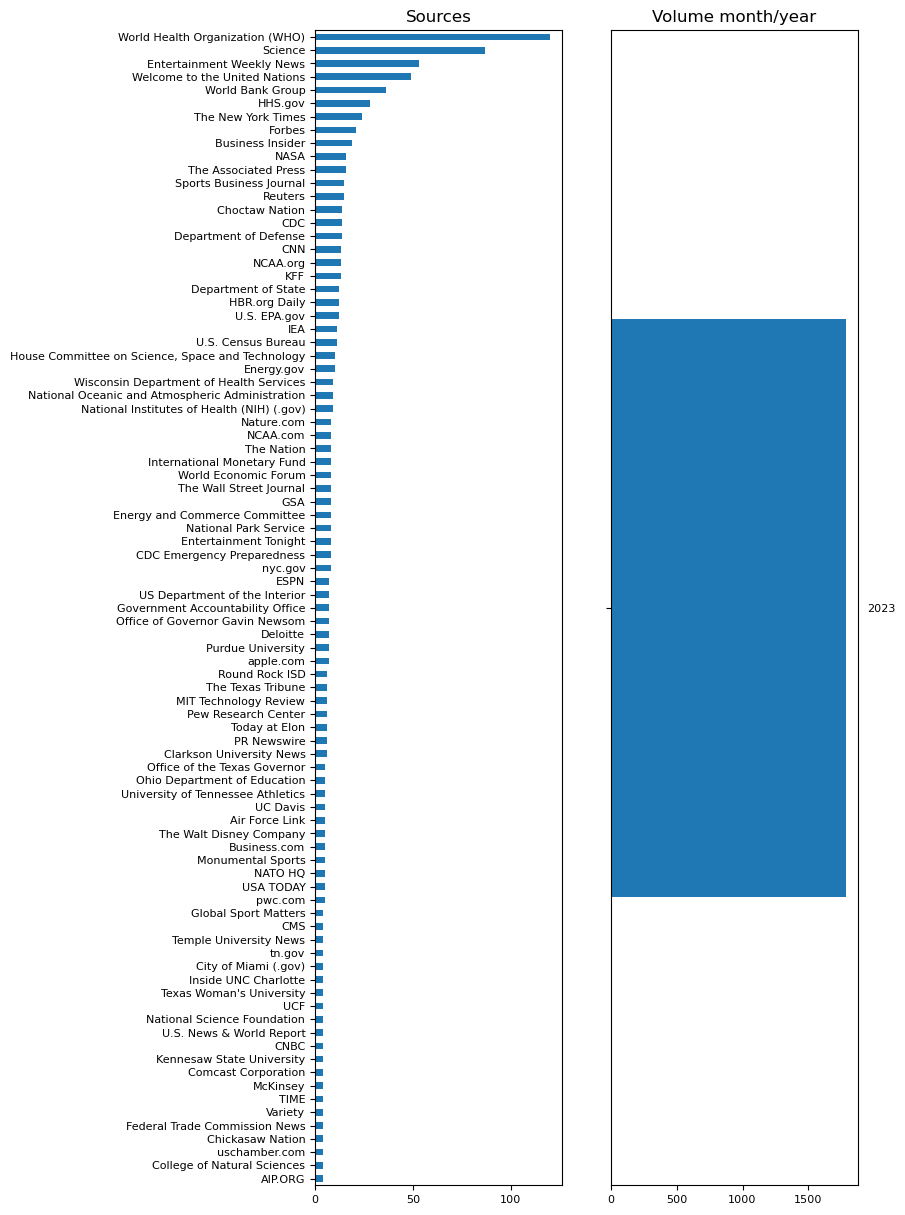

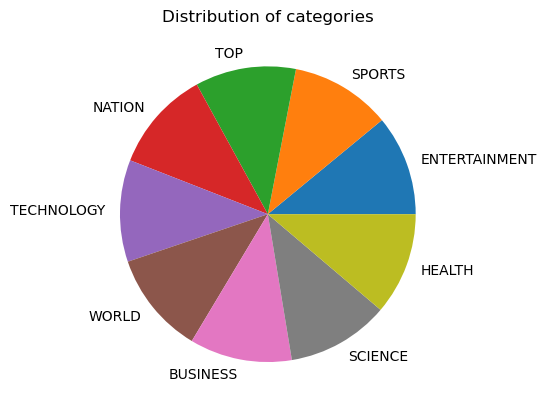

In [3]:
plotDFstatisticsQuerry(df_query,70,True)
displayStats(df_query) 

#### Filter articles with a source that is too/not enought scrapped and source/category/date

 - START -      {'Articles sum': 1786, 'Unique sources': 686, 'Unique/Sum': '2.6'}
 - TOO LOW -    {'Articles sum': 1128, 'Unique sources': 660, 'Unique/Sum': '1.71'}
 - TOO HIGH -   {'Articles sum': 120, 'Unique sources': 1, 'Unique/Sum': '120.0'}
 - WO LOW -     {'Articles sum': 658, 'Unique sources': 26, 'Unique/Sum': '25.31'}
 - LOSS -       {'Articles sum': '1128 (-63.16%)', 'Unique sources :': '660 (-96.21%)', 'Unique/Sum': '2.6 -> 25.31'}

   ------   Raw dataframe   ------   

Shape :  [638, 11]
Column type :  title           object
link            object
published       object
source_url      object
source_title    object
category        object
year            object
year_month      object
pk              object
url_list        object
url_TLD         object
dtype: object



   ------   Most common sources   ------   

source_title
World Health Organization (WHO)                     100
Science                                              87
Entertainment Weekly News           

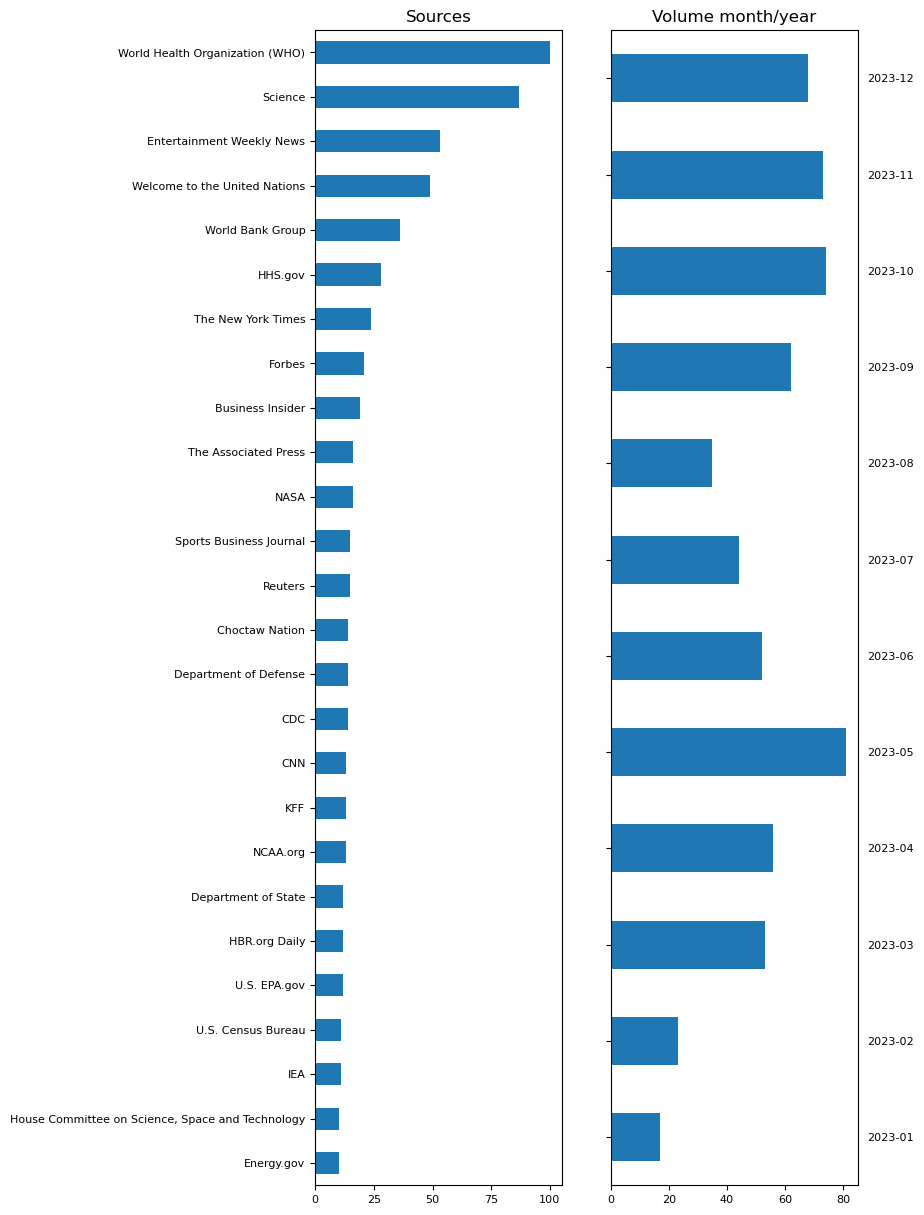

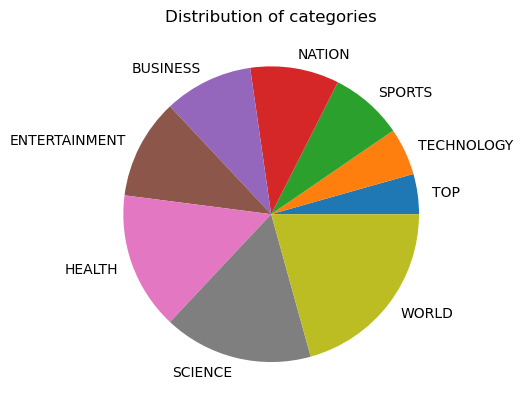

In [4]:
# df = openDFcsv(mv.query_path,mv.query_filename)
# df_query_filter = filterQuerryDataset(df_query,thd_high=400,thd_low=30,display_stats=True,display_end_stats=False,save=True)
df_query_filter = filterQuerryDataset(df_query,thd_high=100,thd_low=10,display_stats=True,display_end_stats=False,save=True)
plotDFstatisticsQuerry(df_query_filter)
displayStats(df_query_filter)

In [5]:
# categroy_l = ["WORLD","NATION","BUSINESS","TECHNOLOGY"]
# source_l = ["Newsweek","Yahoo Finance","ESPN","Fox News","World Health Organization (WHO)","Pew Research Center","The New York Times","Nature.com","Tax Foundation","Union of Concerned Scientists"]
# df3 = selectOnDf(df2,date_start="2010-01-01", date_end="2024-01-01", categroy_list=categroy_l, source_list=source_l)
# displayStats(df3)
# saveDFcsv(df3,mv.query_path,"query_fileG_cap")

### Scrap articles from the web based on the query file

In [ ]:
# df_scrap = openDFcsv(mv.scarp_path,mv.scarp_filename)
df_scrap = readArticleFileTable(index_from=0,
                          index_to=_ENTRY_NUMBER,
                          save_articles=True,
                          save_final=True,
                          save_steps=True,
                          display_df=True,
                          step_pct=_STEP_PCT,
                          add_nlp=2,
                          filtered_input_df=True)

 - Loadind Article #0   (Valid Article)
 - Loadind Article #1   (Valid Article)
 - Loadind Article #2   (Valid Article)
 - Loadind Article #3   (Valid Article)
 - Loadind Article #4   (Valid Article)
 - Loadind Article #5   (Valid Article)
 - Loadind Article #6   (Not valid : Dict could not be read)
 - Loadind Article #7   (Valid Article)
 - Loadind Article #8   (Valid Article)
 - Loadind Article #9   (Not valid : Dict could not be read)
 - Loadind Article #10   (Valid Article)
 - Loadind Article #11   (Not valid : Dict could not be read)
 - Loadind Article #12   (Not valid : Dict could not be read)
 - Loadind Article #13   (Not valid : Dict could not be read)
 - Loadind Article #14   (Not valid : Dict could not be read)
 - Loadind Article #15   (Not valid : Dict could not be read)
 - Loadind Article #16   (Valid Article)
 - Loadind Article #17   (Not valid : Dict could not be read)
 - Loadind Article #18   (Not valid : Dict could not be read)
 - Loadind Article #19   (Valid Article)
 

#### Join the two results

In [ ]:
# df_join1 = openDFcsv(mv.join1_path,mv.join1_filename)
df_join1 = joinQuerryAndParse(save=True,
                        remove_invalid=True,
                        display=True,
                        filtered_input_df=True)

## Generation of Embedding and Keyword data
#### Embedding with OpenAI API

In [ ]:
# df_embdedding = openDFcsv(mv.embdedding_path,mv.embdedding_filename)
df_embdedding = mainGeneration(articleTRUEquestionFALSE=True,
                     completionTRUEembeddingFALSE=False,
                     dimension=50,
                     max_prompt=_ENTRY_NUMBER,
                     token_max_emb=7500,
                     cara_max_emb=10000,
                     save_final=True,
                     display_df_var=True,
                     save_steps=True,
                     step_pct=_STEP_PCT)

In [ ]:
emb_mat = extractEmbeddingFromFile(_ENTRY_NUMBER)

In [ ]:
df_embdedding2 = generateDimReducedDF(n_components=3,
                                      norm_output=True,
                                      active_sel=[True,True,True,True])

In [ ]:
# df = openDFcsv(mv.keyword_path,mv.keyword_filename)
df_keyword = mainKeywordWF(entry_limit=_ENTRY_NUMBER,
              common_word_max=700,
              add_nlp_stats=True,
              nlp_source_col="word_combined_all")

In [ ]:
joinAllDF()

In [ ]:
col_list = ["category","source_title","year_month","url_TLD","year"]
df_list_len = calculateStatsColList(df,col_list,"len",display_df=True)
df_list_npl = calculateStatsColList(df,col_list,"nlp",display_df=True,display_stats=False) 

In [ ]:
# df = openDFcsv(mv.join1_path,mv.join1_filename)
# genrateKeywordExtract(df, 9641,500,"keywords_list")
#df = mainKhttp://localhost:8888/notebooks/OneDrive/Desktop/Article_LLM/main_codebase/MAIN_CODE.ipynb#eywordWF(9641,1000)

In [ ]:
# df = openDFcsv(mv.query_path,mv.query_filename)
# df3 = selectOnDf(df2,"","")
# plotDFstatisticsQuerry(df,70)
# displayStats(df)
# saveDFcsv(df3,mv.query_path,mv.query_filename)



# df = loop_scraping(9,'1999-03-27','2024-03-19',sampling_1=5,sampling_2=5,save_steps=True,save_final=True,display=True)
# plotDFstatisticsQuerry(df,70)
# displayStats(df)

# df = openDFcsv(mv.query_path,mv.query_filename)
# df2 =  filterQuerryDataset(df,150,10,True,True,True)
# plotDFstatisticsQuerry(df2,70,True)
# displayStats(df2)

# df = openDFcsv(mv.query_path,mv.query_filename)
df_querry = readArticleFileTable(index_from=0,index_to=200,save_articles=False,save_final=True,save_steps=True,display_df=True,step_pct=0.01,add_nlp=2,filtered_input_df=True)
# df_join = joinQuerryAndParse(save=True,remove_invalid=True,display=True,filtered_input_df=True)# df_embd = mainGeneration(True,False,100,99999999,7500,9999,True,True,True,0.005)
# emb_mat = extractEmbeddingFromFile(9999999999)
# df_key = mainKeywordWF(99999999999999,1000)
# df_final = mainJoinOut()

In [ ]:
# df = openDFcsv(mv.query_path,mv.query_filename)
# df3 = selectOnDf(df2,"","")
# plotDFstatisticsQuerry(df,70)
# displayStats(df)
# saveDFcsv(df3,mv.query_path,mv.query_filename)


max_num = 10000000
step_pct=0.005
df = loop_scraping(9,'2000-01-01','2024-01-01',sampling_1=5,sampling_2=5,save_steps=True,save_final=True,display=True)
df2 =  filterQuerryDataset(df,150,10,True,True,True)
df_querry = readArticleFileTable(index_from=0,index_to=max_num,save_articles=True,save_final=True,save_steps=True,display_df=True,step_pct=step_pct,add_nlp=2,filtered_input_df=True)
df_join = joinQuerryAndParse(save=True,remove_invalid=True,display=True,filtered_input_df=True)
df_embd = mainGeneration(True,False,10,max_num,7500,1000,True,True,True,step_pct)
emb_mat = extractEmbeddingFromFile(max_num)
df_key = mainKeywordWF(max_num,100)
df_final = mainJoinOut()

In [ ]:
df = loop_scraping(9,'2000-01-01','2024-01-01',sampling_1=1,sampling_2=1,save_steps=True,save_final=True,display=True)

In [ ]:
df = openDFcsv(mv.join1_path,mv.join1_filename)
# col_list = ["category"] #,"url_TLD" #,"source_title","year_month",
# col_list = ["published"]
col_list = ["category","year","source_title","year_month"]#
df_list1 = calculateStatsColList(df,col_list,"len",display_df=True)
df_list2 = calculateStatsColList(df,col_list,"nlp",display_df=True,display_stats=True) #,out_raw=False

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(col_list)) :
    col_agg = col_list[i]
    table = df_list2[i]
    table.plot(kind='bar')
    plot = df_list[2].plot.barh(y='polarity_per_count',use_index=True, legend=True, fontsize= 8, title="test") #, figsize=(5, 5) #,ax=axes[0],ay=axes[0], ylabel=""


In [ ]:
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# df_list[0].ix[5].plot(kind='bar'); plt.axhline(0, color='k')
    

In [ ]:
import plotly.express as px

fig = px.line(df_list2[1], x=df_list2[1].index, y="count") #, color='country'
fig.show()
fig = px.line(df_list2[1], x=df_list2[1].index, y="polarity_per_count") #, color='country'
fig.show()
fig = px.line(df_list2[1], x=df_list2[1].index, y="positivity_per_count") #, color='country'
fig.show()
fig = px.line(df_list2[1], x=df_list2[1].index, y="negativity_per_count") #, color='country'
fig.show()

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Life expentancy progression of countries per continents'),
    dcc.Graph(id="graph"),
    dcc.Checklist(
        id="checklist",
        options=["Asia", "Europe", "Africa","Americas","Oceania"],
        value=["Americas", "Oceania"],
        inline=True
    ),
])


@app.callback(
    Output("graph", "figure"), 
    Input("checklist", "value"))
def update_line_chart(continents):
    df = px.data.gapminder() # replace with your own data source
    mask = df.continent.isin(continents)
    fig = px.line(df[mask], 
        x="year", y="lifeExp", color='country')
    return fig


app.run_server(debug=True)